In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

from farhad.utils import plot_training_summary
from farhad.utils import TimeSummary
from farhad.utils import set_seed

import inspect

# Introduction to Deep Learning with Keras and Tensorflow || Rodrigo Agundez

<font color="red" size="5" >REFRENCE:</font>

https://www.youtube.com/watch?v=45MbmHQ5iMY
    
https://github.com/rragundez/PyDataAmsterdam2018

## Build dummy model

<img src="https://github.com/rragundez/PyDataAmsterdam2018/raw/94ba390d7bf5f13c5e8242fb67e9e350785e24e2/images/model_diagram.gif">

In [3]:
from keras.models import Sequential 
from keras.layers import Dense

<b>Note:</b><br>
First, you make a Model (Sequential) <br>
we have three layer (Danse)<br>
in first layer, you should  adjust the shpae of input. (for other layer keras adjust automatic)<br>
Every layer need activaton funcation.  (activation="")<br> 
For Every layer, you needs to adjust number of nodes. (first layer has three nodes (nurones). second layer has two, last layer has one nodes ) <br>


In [ ]:
model = Sequential()

- Sequential is easier api fo keras : layer coming after by after (Don't coming back anf branching and reconnecting)
- Other keras api is funtional api.

In [ ]:
model.add(Dense(3,activation='relu',input_dim=2,name="first_layer"))
# first layer, you should become clear diagrame input with input_dim and .., 
#activation funcation is choose accroding your model. becuse we want to any node have contion with input, we choose relu. (according figure)
# 3 is number of nodes



In [ ]:
model.add(Dense(2,activation='relu',name='secound_layer'))
model.add(Dense(1, activation='sigmoid', name='third_layer'))
# activation is sigmod to give us a normal result.

In [ ]:
model.summary()

<b>First_lauer: 9 parameter => (w11 , w12 , w21, w22,w13,w23, b1, b2, b3 )( for example for first node: f1 = w1.x1 + w2.x2 + b1)

In [ ]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
print(model.get_config())

## Feed model:

In [8]:
moons =pd.read_csv('moons.csv')
moons.sample(2)

,Unnamed: 0,x1,x2,y
24,96,1.527575,-0.382667,1
83,332,1.871128,0.562687,1


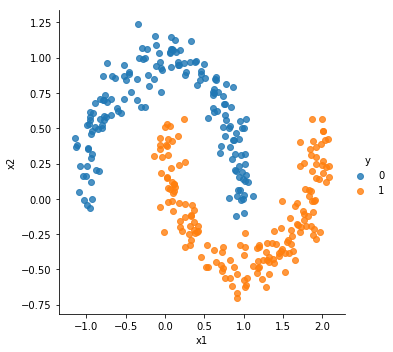

In [10]:
sns.lmplot(data=moons, x='x1', y='x2', hue='y', fit_reg=False)

In [ ]:
#separate in train and test data
train_index = moons.sample(frac=0.8, random_state=21).index
X_train, y_train = moons.iloc[train_index][['x1', 'x2']], moons.iloc[train_index]['y']
X_test, y_test = moons.drop(index=train_index)[['x1', 'x2']], moons.drop(index=train_index)['y']

In [ ]:
summary = model.fit(
    X_train, y_train,
    batch_size=100, 
    epochs=20,
    validation_split=0.1,
    verbose=0,
    callbacks=[time_summary]
)
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_training_summary(summary, time_summary)

- Number of samples per gradient update,
- Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
- verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
- callbacks: List of keras.callbacks.Callback instances. List of callbacks to apply during training.
- Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.

<font size="6"><b> Chapter 2 - PLus Theory:

This section, I describe theory behind ay function use in this chapter.

## relu activation funcation:

https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/26064d2e9232bbb8579577982d29e7f374b08003">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Rectifier_and_softplus_functions.svg/440px-Rectifier_and_softplus_functions.svg.png">

Blue is relu

## sigmod acticvation funcation:

https://en.wikipedia.org/wiki/Sigmoid_function

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9537e778e229470d85a68ee0b099c08298a1a3f6">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png">



## optimazer Adam:

https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

paper:
https://arxiv.org/abs/1212.5701

In [ ]:
keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

Arguments

- lr: float >= 0. Initial learning rate, defaults to 1. It is recommended to leave it at the default value.
- rho: float >= 0. Adadelta decay factor, corresponding to fraction of gradient to keep at each time step.
- epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
- decay: float >= 0. Initial learning rate decay.

<b> Adam was presented at a very prestigious conference for deep learning practitioners — ICLR 2015. The paper contained some very promising diagrams, showing huge performance gains in terms of speed of training. However, after a while people started noticing, that in some cases Adam actually finds worse solution than stochastic gradient descent. A lot of research has been done to address the problems of Adam. but works really well in on-line settings.

## binary_crossentropy

https://en.wikipedia.org/wiki/Cross_entropy

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0cb6da032ab424eefdca0884cd4113fe578f4293">

it is usually used for when we have more  than one class <br>
funcation : E[p,q] = ∑p_{i} log(q_{i}) <br>
( estimated probability of outcome i is q_{i} )<br>
( frequency (empirical probability) of outcome i in the training set p_{i})

<b>metrics:</b> <br>
List of metrics to be evaluated by the model
            during training and testing.
            Typically you will use `metrics=['accuracy']`.
            To specify different metrics for different outputs of a
            multi-output model, you could also pass a dictionary,
            such as `metrics={'output_a': 'accuracy'}`.